In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25)
fc, pc, tc = data_instance.create_dataset(50, 2, [100], [0.2], True)

In [3]:
import torch
torch.manual_seed(226)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model_diag = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
model_chol = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [7]:
model_chol.set_device(device)

In [8]:
model_chol.train_cholesky(num_epochs=20, learning_rate=0.0002)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:170: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/aten/src/ATen/native/TensorShape.cpp:3637.)
  posterior_mean.T @ torch.linalg.inv(posterior_cholesky) @ posterior_mean)


Epoch:0, Loss: 706.2750064304897
Epoch:1, Loss: 267.02904471572566
Epoch:2, Loss: 181.1545965456059
Epoch:3, Loss: 2122.7007373029714
Epoch:4, Loss: 670.6808635600228
Epoch:5, Loss: 849.0300992132343
Epoch:6, Loss: 153.75692548923715
Epoch:7, Loss: -315.2981079780303
Epoch:8, Loss: 325.09138858370494
Epoch:9, Loss: -73.63852311876202
Epoch:10, Loss: -1164.143858230833
Epoch:11, Loss: 4111.258601285627
Epoch:12, Loss: 873.2867196085355
Epoch:13, Loss: -746.1686026300376
Epoch:14, Loss: -76.01842180952268
Epoch:15, Loss: 446.1687735602049
Epoch:16, Loss: 649.04446573321
Epoch:17, Loss: 170.8124582700275
Epoch:18, Loss: 287.5895936479504
Epoch:19, Loss: 540.0348077159599


In [9]:
model_chol.set_test_data(tc)

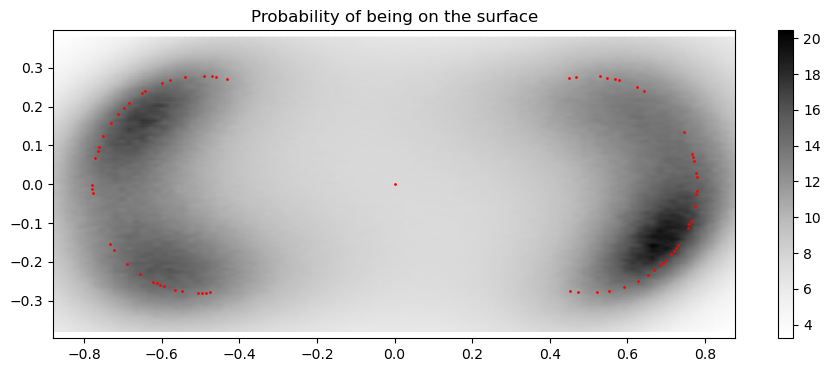

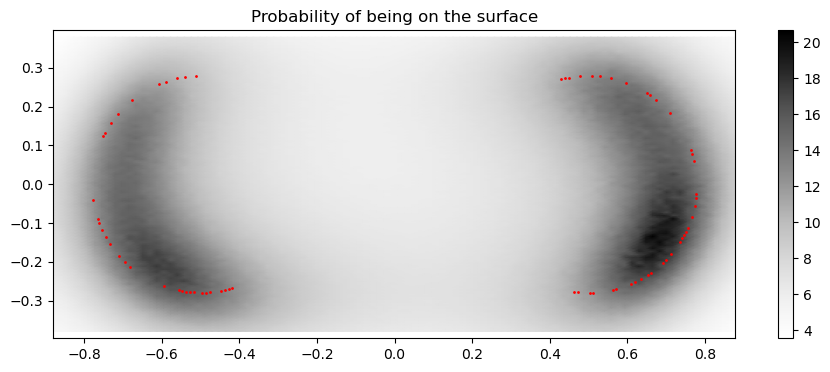

In [10]:
model_chol.predict()

In [11]:
model_chol.set_test_data(pc[:2, :])

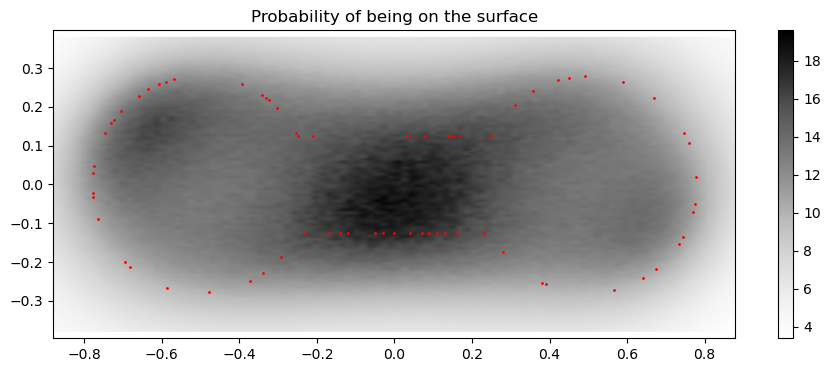

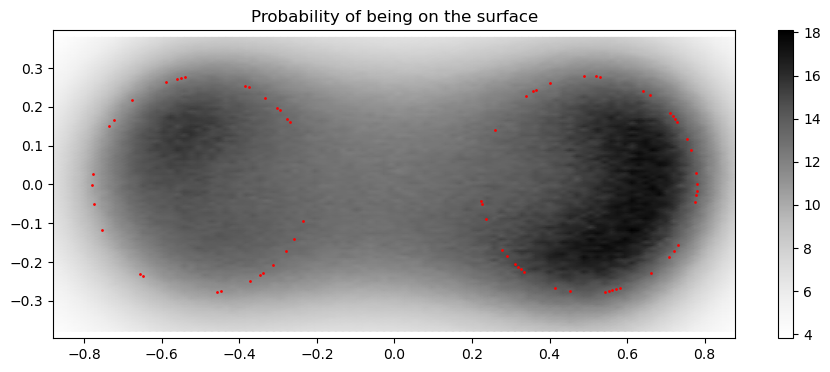

In [12]:
model_chol.predict()